In [100]:
import numpy as np
import matplotlib.pyplot as plt

In [101]:
def load_path(series, path):
    #print(f"load {path}");
    data = np.loadtxt(path)
    size = data[0, 0]
    if not np.all(data[:, 0] == size):
        print(f"ERROR, found bad size {path}")
        exit(1)
    mem = data[0, 2]
    if not np.all(data[:, 2] == mem):
        print(f"ERROR, found bad mem {path}")
        exit(1)
    avg_time = np.average(data[:, 1])
    #print(f"{size} {mem} {avg_time}")
    series.append([size, mem, avg_time])

In [118]:
pow_min = 4
pow_max = 8
bases = [1, 3, 5, 7, 11]
mm_in_data = []
mm_out_data = []
output_dir = "../data/macbook_run_01"
mm_t = 0;
for power in range(pow_min, pow_max + 1):
    for base in bases:
        timing_file = f"{output_dir}/p{power}_b{base}_t0.txt"
        load_path(mm_in_data, timing_file)

        timing_file = f"{output_dir}/p{power}_b{base}_t1.txt"
        load_path(mm_out_data, timing_file)
mm_in_data_np = np.array(mm_in_data)
mm_out_data_np = np.array(mm_out_data)
mm_in_data_np = np.sort(mm_in_data_np, axis=0)
mm_out_data_np = np.sort(mm_out_data_np, axis=0)

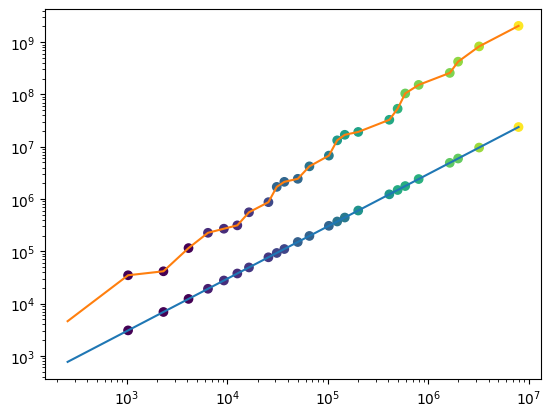

In [119]:
ax = plt.gca()
ax.set_yscale('log')
ax.set_xscale('log')
plt.plot(mm_in_data_np[:,0], mm_in_data_np[:,1])
plt.scatter(mm_in_data_np[:,0], mm_in_data_np[:,1],norm="log",c=mm_in_data_np[:,2])
0plt.plot(mm_out_data_np[:,0], mm_out_data_np[:,1])
plt.scatter(mm_out_data_np[:,0], mm_out_data_np[:,1],norm="log",c=mm_out_data_np[:,2])

In [ ]:
k